## PROJECT: Predicting no-show appoinments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and EDA</a></li>
     <ol>
        <li><a href='#Importing'>Importing libraries</a></li>
        <li><a href='#Loading'>Loading data</a></li>
        <li><a href='#checking'>Checking for duplicated values, number of rows and column, types of data and info of the data (for any null values).</a></li>
        <li><a href='#editing'>Checking/editing for misspelled column name.</a></li>
        <li><a href='#oddvalue'>Iterate thru the columns to qucikly check if there is any odd value.</a></li>
        <li><a href='#drop'>Checking the columns/unique value to decide which column to edit/drop.</a></li>
        <li><a href='#exploring1'>Exploring ScheduledDay and AppointmentDay</a></li>
        <li><a href='#exploring2'>Exploring Neighbourhood</a></li>
        <li><a href='#proportion'>Show/No show proportion </a></li>
    </ol>
<li><a href="#visual">Data Visualization</a></li>
    <ol>
        <li><a href='#general'>Show/Noshow Patients in Vitoria, Brazil</a></li>
        <li><a href='#gender'>Gender</a></li>
        <li><a href='#age'>Age</a></li>
        <li><a href='#n'>Neighbourhood</a></li>
    </ol>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project I have chosen a No Shows Medical Appointments which can be retireved from [Medical Appointment No Shows
](https://www.kaggle.com/joniarroba/noshowappointments). The dataset consisted of data from hospital in neighborhood of the Municipality of Vitória in the State of Espírito Santo, Brazil. In this experiment, I will perform a data wrangling, an exploratory data analysis that contain visualization and lastly will perdict <strong>what features would help us determine if the patient who has set up the appointments but did not showed up</strong>.

<a id='wrangling'></a>
## Data Wrangling and EDA 

<a id='Importing'></a>
> 1. Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

<a id='Loading'></a>
> 2. Loading data using pandas 

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='checking'></a>
> 3. Checking for duplicated values, number of rows and column, types of data and info of the data (for any null values).

In [3]:
print(df.duplicated().sum())

0


In [4]:
df.shape

(110527, 14)

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='editing'></a>
> 4. Checking/editing for misspelled column name

In [7]:
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


> From the result here are the columns name that I will edit to avoid confusion int the future:<ol><li>'Hipertension': 'Hypertension'</li> <li>'Handcap': 'Handicap'</li> <li>'SMS_received': 'SMSReceived'</li> <li>'No-show': 'NoShow'</li></ol>

In [8]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

> Testing df with new edited columns name

In [9]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='oddvalue'></a>
> 5. Iterate thru the columns to qucikly check if there is any odd value. 

In [10]:
col_list = df.columns.values.tolist()
for col in df:
    print(df[col].unique())

[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
['F' 'M']
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  4

> From the result of this iteration: 

<ol><li><strong>ScheduledDay</strong> and <strong>AppointmentDay</strong> will be changed to DateTime</li><li><strong>PatientID</strong> is float number, will need to change it to integer.</li><li> The odd age of the patient is 0 and -1, assumming 0 is newborn infants and -1 is fetus. I decided to drop a column with age -1. Very interesting finding is a person age 115 but this is normal given that the oldest person in the world is Jeanne Calment who is 122 years old.</li> 
</ol>

> I will call the new df as ver1_df.

In [11]:
#quicly check if patients whose age are 115 should be in wheelchair and handicapped
df.loc[df['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [12]:
# ScheduledDay and AppointmentDat to Datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

#PatientID to integer
df['PatientId'] = df['PatientId'].astype('int64')

> Data with patient age -1

In [13]:
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
#drop the fetus and called the df, ver1_df
ver1_df = df.drop([99832])

> Testing if the data has been dropped

In [15]:
#checking if the fetus is dropped
ver1_df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


In [224]:
#Save ver1_df to the folder
ver1_df.to_csv('ver1_df.csv', index=False)

<a id='drop'></a>
> 6. Checking the columns/unique value to decide which column to edit/drop.

In [17]:
#14 features
for i, v in enumerate(ver1_df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hypertension
9 Diabetes
10 Alcoholism
11 Handicap
12 SMSReceived
13 NoShow


In [18]:
print(format(ver1_df.Gender.unique()))
print(format(ver1_df.Scholarship.unique()))
print(format(ver1_df.Hypertension.unique()))
print(format(ver1_df.Diabetes.unique()))
print(format(ver1_df.Alcoholism.unique()))
print(format(ver1_df.Handicap.unique()))
print(format(ver1_df.SMSReceived.unique()))
print(format(ver1_df.NoShow.unique()))

['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


<ol>
    <li> <strong>PatientID</strong> and <strong>AppointmentID</strong> will be drop because it is hospital's random generated number. If there is anything associate with price or medical coverage, this factor will be very interesting to explore.</li>
    <li> There are 11 dependent vairable (excludes PatientID and AppointmentID) and 1 varible which is <strong>NoShow</strong>.</li>
    <li> <strong>Handicap</strong> has 4 unique value and <strong>Gender</strong> has F, M values while the other features has integer type. I will convert the other features to object type for easier use.</li>
</ol>

In [19]:
#dropping PatientID and AppointmentID
ver1_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [20]:
#converting to object type
ver1_df['Scholarship'] = ver1_df['Scholarship'].astype('object')
ver1_df['Hypertension'] = ver1_df['Hypertension'].astype('object')
ver1_df['Diabetes'] = ver1_df['Diabetes'].astype('object')
ver1_df['Alcoholism'] = ver1_df['Alcoholism'].astype('object')
ver1_df['Handicap'] = ver1_df['Handicap'].astype('object')
ver1_df['SMSReceived'] = ver1_df['SMSReceived'].astype('object')

In [21]:
#confirming the column dropped and data types
ver1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Age             110526 non-null  int64         
 4   Neighbourhood   110526 non-null  object        
 5   Scholarship     110526 non-null  object        
 6   Hypertension    110526 non-null  object        
 7   Diabetes        110526 non-null  object        
 8   Alcoholism      110526 non-null  object        
 9   Handicap        110526 non-null  object        
 10  SMSReceived     110526 non-null  object        
 11  NoShow          110526 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 11.0+ MB


<a id='exploring1'></a>
> 7. Exploring <strong>ScheduledDay</strong> and <strong>AppointmentDay</strong>

In [22]:
print(format(np.sort(ver1_df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '2016-04-16' '2016-04-18'
 '2016-04-

> We can see that the ScheduledDay are ranging from 2015-11-10 to 2016-06-08. That is 211 day or <strong>6 month</strong> and <strong>29 day</strong>. 

In [23]:
print(format(np.sort(ver1_df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


> Here in the AppointmentDay where the date are raning from 2016-04-29 to 2016-06-08 which is 40 days or <strong>1 month</strong> and <strong>10 day</strong> comparing to the ScheduleDay which is 7 month where people tends to have their appointment dat in this rage. 

<a id='exploring2'></a>
> 8. Exploring <strong>Neighbourhood</strong>

In [24]:
#counts
ver1_df.Neighbourhood.nunique()

81

In [25]:
#name of the Neighbourhood
ver1_df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

> There is one particular odd municipality called <strong>ILHAS OCEÂNICAS DE TRINDADE</strong> where it is an isolated archepological island the facility is used by the Brazilian Naval Officer. 

In [26]:
ver1_df.loc[ver1_df['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
48754,F,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes
48765,F,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,Yes


> Very interesting! both have the same date to set up their appointment and have the same appointment day. Both of them did not show up for the appointment. I will drop this manicipality because there is no significant data and save it to ver2_df.  

In [27]:
ver2_df = ver1_df.drop([48754,48765])

In [28]:
#ver2_df should have 80 manicipality
ver2_df.Neighbourhood.nunique()

80

In [53]:
# save ver2_df to the folder
ver2_df.to_csv('ver2_df.csv', index=False)

<a id='proportion'></a>
> 9. Show/No show proportion 

In [30]:
#Noshow counts
ver2_df.groupby(['NoShow']).size()

NoShow
No     88207
Yes    22317
dtype: int64

In [31]:
show = ver2_df.groupby(['NoShow']).size()[0] / (ver2_df.groupby(['NoShow']).size()[0] + ver2_df.groupby(['NoShow']).size()[1])
percentage = "{:.2%}".format(show)
print("Percentage of patients who showed up for their appointment is " + percentage)

Percentage of patients who showed up for their appointment is 79.81%


In [32]:
noshow = ver2_df.groupby(['NoShow']).size()[1] / (ver2_df.groupby(['NoShow']).size()[0] + ver2_df.groupby(['NoShow']).size()[1])
percentage2 = "{:.2%}".format(noshow)
print("Percentage of patients who did not showed up for their appointment is " + percentage2)

Percentage of patients who did not showed up for their appointment is 20.19%


<a id='visual'></a>
## Data Visualization

<a id='general'></a>
> 1. From the porportion above we can say that out of <strong>110,524</strong> patients only <strong>88,207</strong> came to their appointment which is <strong>79.81%</strong>.

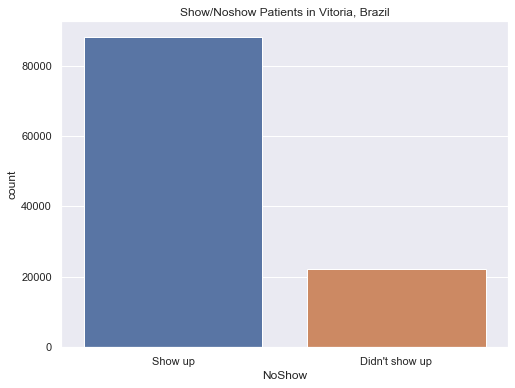

In [52]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
ax = sns.countplot(data = ver2_df, x= ver2_df.NoShow)
ax.set_title('Show/Noshow Patients in Vitoria, Brazil')
noshow=['Show up', 'Didn\'t show up']
ax.set_xticklabels(noshow)
plt.show()

<a id='gender'></a>
> 2. Gender

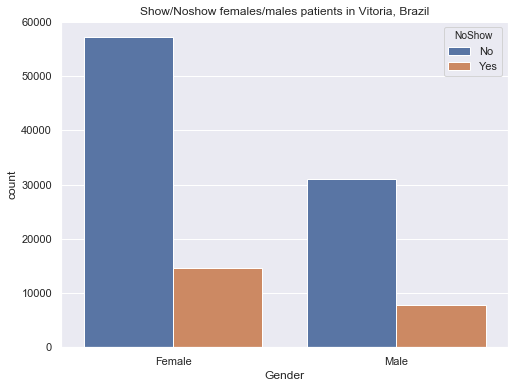

In [34]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
ax = sns.countplot(data = ver2_df, x= ver2_df.Gender, hue=ver2_df.NoShow)
ax.set_title('Show/Noshow females/males patients in Vitoria, Brazil')
gender=['Female', 'Male']
ax.set_xticklabels(gender)
plt.show()

> <ol> 
    <li> <strong>Females</strong> showed up to their appointment than <strong>males</strong> does.</li>
    <li> However the no show distribution for both <strong>females</strong> and <strong>males</strong> is almost the same.</li>
    <li> Gender might and might not play an important role in determining if a patients come to the appointment. 
</ol>

<a id='age'></a>
> 3. Age

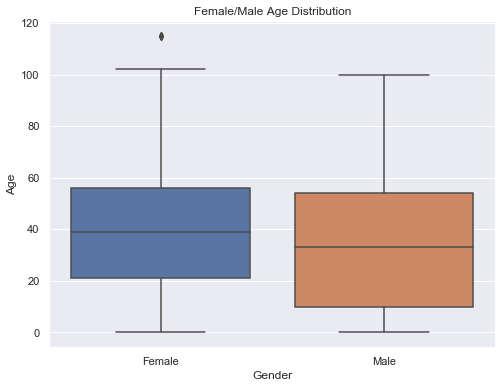

In [104]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
ax = sns.boxplot(x='Gender', y='Age', data=ver2_df)
ax.set_title('Female/Male Age Distribution')
gender=['Female', 'Male']
ax.set_xticklabels(gender)
plt.show()

> From the boxplot we can assume that the median age is around 30. The IQR is around 15-55 With an outlier being 115 years old. 

In [95]:
#Age in range
def age_buckets(x): 
    if x < 4: return '0-4' 
    elif x < 9: return '5-9' 
    elif x < 14: return '10-14' 
    elif x < 19: return '15-19' 
    elif x < 24: return '20-24'
    elif x < 29: return '25-29' 
    elif x < 34: return '30-34' 
    elif x < 39: return '35-39' 
    elif x < 44: return '40-44' 
    elif x < 49: return '45-49' 
    elif x < 54: return '50-54' 
    elif x < 59: return '55-59' 
    elif x < 64: return '60-64' 
    elif x < 69: return '65-69'
    elif x < 74: return '70-74'
    elif x < 69: return '65-69'
    elif x < 79: return '75-79'
    elif x < 84: return '80-84'
    elif x < 94: return '90-94'
    elif x < 99: return '95-99'
    elif x >=99: return '100+' 
    else: return 'other'
    
ver2_df['Agerange'] = ver2_df.Age.apply(age_buckets)

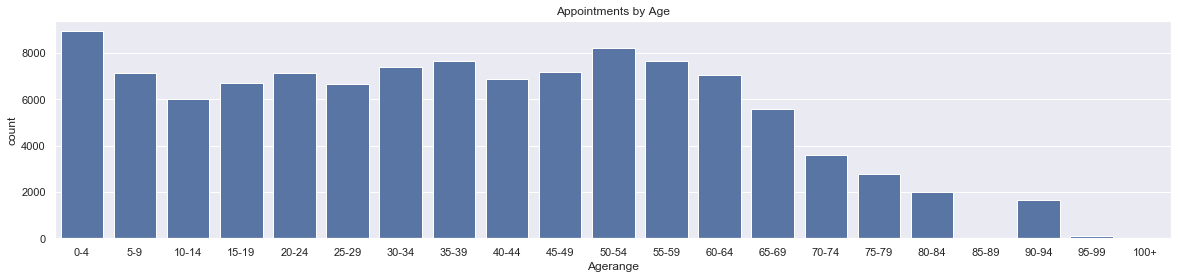

In [102]:
AgeClass = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
plt.figure(figsize=(20,4))
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
ax = sns.countplot(x=ver2_df.Agerange,color=base_color,order=AgeClass)
ax.set_title("Appointments by Age")
plt.show()

> Above the histogram I have create a new column called <strong>Agerange</strong> where I create a range for the features 'Age'. According to the histogram above, we can see that the age range beentween 0-4 at its peaks while at a range of 55-59 looking right-skwed.  

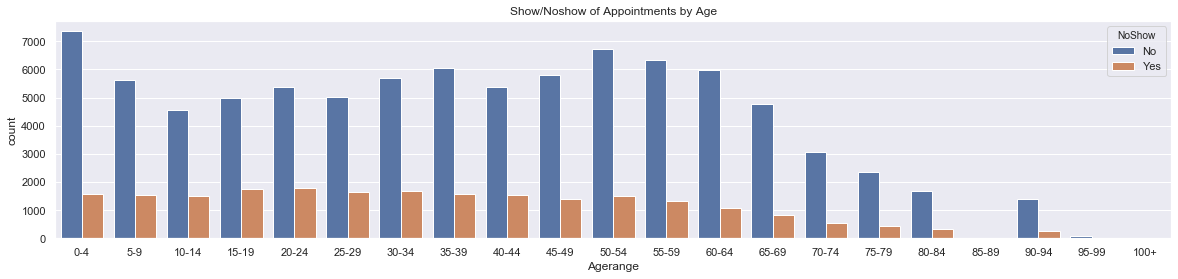

In [174]:
AgeClass = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
plt.figure(figsize=(20,4))
sns.set(style = "darkgrid")
ax = sns.countplot(x=ver2_df.Agerange,hue=ver2_df.NoShow,order=AgeClass)
ax.set_title("Show/Noshow of Appointments by Age")
plt.show()

> The Show/Noshow look almost the same at all age, where the significant is on the range of 0-4 and 20-24.

In [198]:
age_ratio = ver2_df[ver2_df.NoShow == 'No'].groupby(['Age']).size()/ver2_df.groupby(['Age']).size()

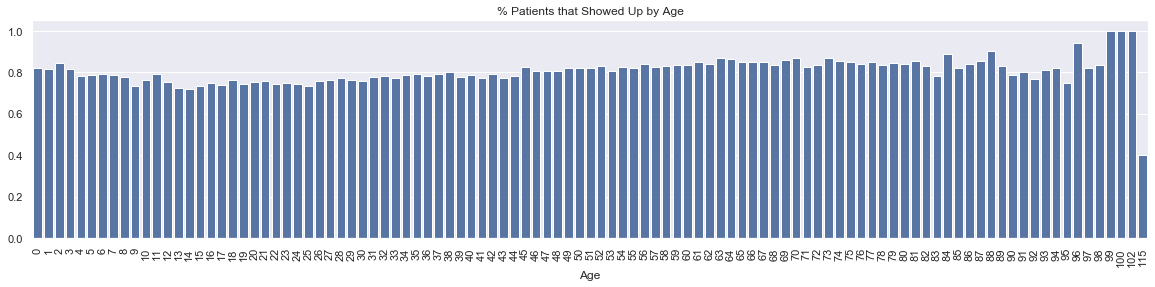

In [205]:
plt.figure(figsize=(20,4))
sns.set(style = "darkgrid")
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
ax = sns.barplot(x=age_ratio.index, y=age_ratio,color=base_color)
ax.set_title("% Patients that Showed Up by Age")
plt.show()

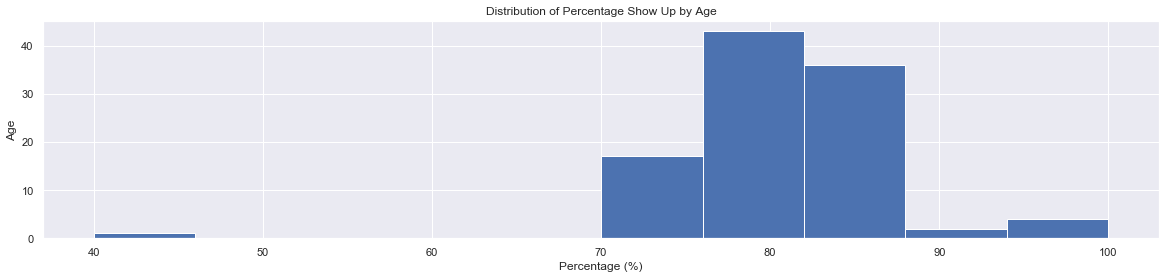

In [215]:
plt.figure(figsize=(20,4))
sns.set(style = "darkgrid")
base_color = sns.color_palette()[0]
ax = plt.hist(age_ratio*100)
plt.ylabel('Age')
plt.xlabel('Percentage (%)')
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

> Patient in that particular age have around 80% show rate. This features will be very helpful in determine those who did not show up.

<a id='n'></a>
> 4. Neighbourhood

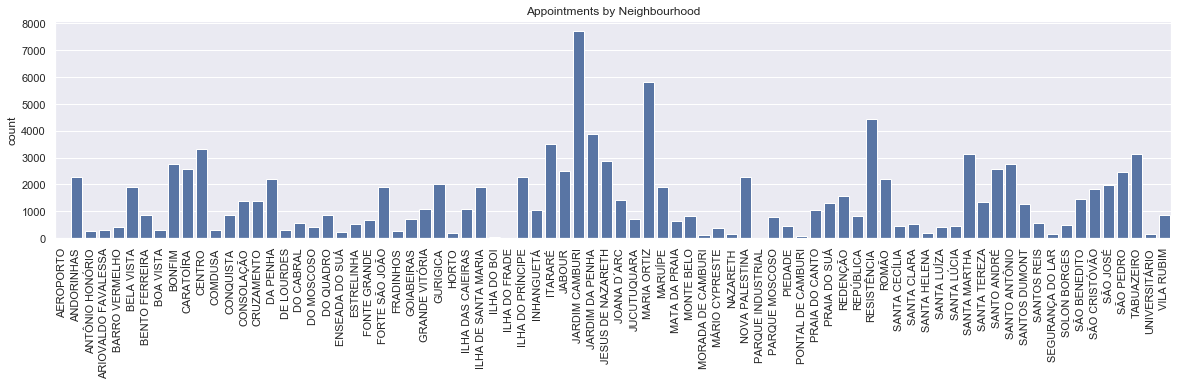

In [182]:
plt.figure(figsize=(20,4))
sns.set(style = "darkgrid")
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(ver2_df.Neighbourhood),color=base_color)
ax.set_title("Appointments by Neighbourhood")
plt.show()

In [216]:
n_ratio = ver2_df[ver2_df.NoShow == 'No'].groupby(['Neighbourhood']).size()/ver2_df.groupby(['Neighbourhood']).size()

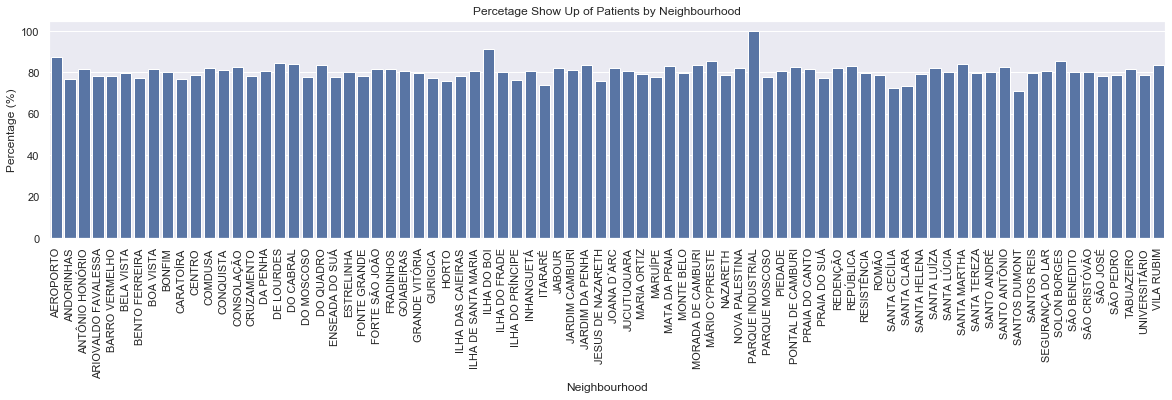

In [223]:
plt.figure(figsize=(20,4))
sns.set(style = "darkgrid")
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
ax = sns.barplot(x=n_ratio.index, y=n_ratio*100,color=base_color)
ax.set_ylabel('Percentage (%)')
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

> Almost all of the neighbourhood have 70% of show rate. This features might not be necessary to determine our model.

<a id='s'></a>
> 5. Scholarship 

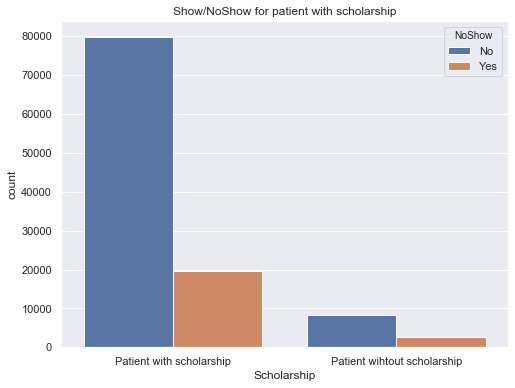

In [236]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
ax = sns.countplot(data=ver2_df,x=ver2_df.Scholarship,hue=ver2_df.NoShow)
ax.set_title("Show/NoShow for patient with scholarship")
x_ticks_labels=['Patient with scholarship', 'Patient wihtout scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()